In [8]:
# Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

# Load the dataset
movies_df = pd.read_csv('C:/Users/rushi/Desktop/University of Maryland/1. Spring 2024/INST 414/Module 4 Assignment/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
# Split genres and convert to list
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|'))

# One-Hot Encoding of Genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(movies_df['genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
genres_df.head()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


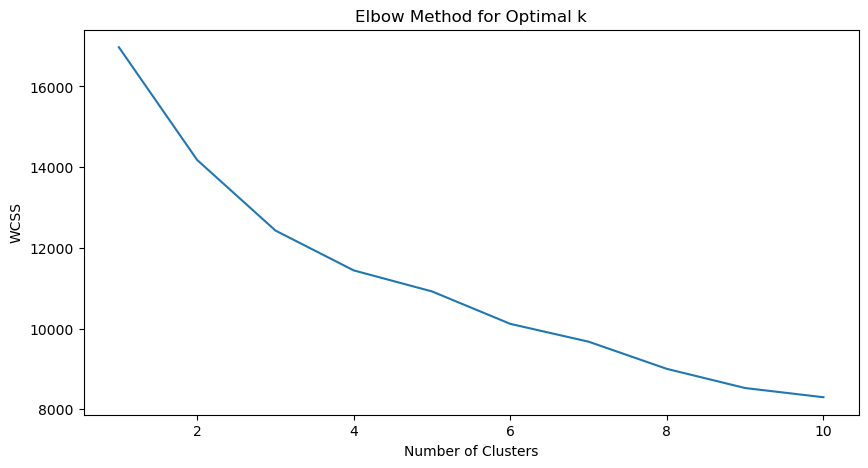

In [10]:
# Determine optimal k value using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(genres_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Apply KMeans clustering with selected optimal k
optimal_k = 4  # Update based on the Elbow graph observation
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
movies_df['Cluster'] = kmeans.fit_predict(genres_df)
print("Cluster assignment for each movie:")
print(movies_df[['title', 'Cluster']].head(10))  # Display the first 10 entries to check cluster assignment

Cluster assignment for each movie:
                                title  Cluster
0                    Toy Story (1995)        1
1                      Jumanji (1995)        3
2             Grumpier Old Men (1995)        1
3            Waiting to Exhale (1995)        1
4  Father of the Bride Part II (1995)        1
5                         Heat (1995)        0
6                      Sabrina (1995)        1
7                 Tom and Huck (1995)        3
8                 Sudden Death (1995)        3
9                    GoldenEye (1995)        0


In [12]:
# Aggregate genre data by cluster
clustered_genre_counts = movies_df.join(genres_df).groupby('Cluster').sum()

# Display the aggregated data for inspection
print(clustered_genre_counts)

           movieId                                              title  \
Cluster                                                                 
0         77675616  Heat (1995)GoldenEye (1995)Money Train (1995)G...   
1        155990718  Toy Story (1995)Grumpier Old Men (1995)Waiting...   
2         82857227  Nixon (1995)Casino (1995)Sense and Sensibility...   
3         94592284  Jumanji (1995)Tom and Huck (1995)Sudden Death ...   

                                                    genres  \
Cluster                                                      
0        [Action, Crime, Thriller, Action, Adventure, T...   
1        [Adventure, Animation, Children, Comedy, Fanta...   
2        [Drama, Crime, Drama, Drama, Romance, Drama, S...   
3        [Adventure, Children, Fantasy, Adventure, Chil...   

         (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
Cluster                                                                       
0                         0   